#### <h1><center>CMSC 471: Artificial Intelligence</center></h1>

<center><img src="img/title.jpg" align="center"/></center>


<h3 style="color:blue;"><center>Instructor: Fereydoon Vafaei</center></h3>


<h5 style="color:purple;"><center>Linear Regression, Regularized and Logistic Regression and Gradient Descent</center></h5>

<center><img src="img/UMBC_logo.png" align="center"/></center>

<h1><center>Agenda</center></h1>

- Regression:
    - Linear Regression
    - Polynomial Regression
    - Regularized Regression
    
- Logistic Regression

- Gradient Descent

<h1><center>Linear Regression</center></h1>

- The simplest model to predict a continuous (numerical) value.


- Two approaches:
    - Closed Form Solution - Normal Equation (aka Least Squares)
    - Optimization Solution - Least Mean Squares using Gradient Descent

<h1><center>Linear Regression - Math Notation</center></h1>

**Equation 4-1: Linear Regression model prediction**

$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$


**Equation 4-2: Linear Regression model prediction (vectorized form)**

$
\hat{y} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x} = \boldsymbol{\theta}^T \mathbf{x}
$

<h1><center>Linear Regression - Performance Measure</center></h1>

**Equation 4-3: MSE cost function for a Linear Regression model**

$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$



**Equation 2-2: Mean Absolute Error**

$
\text{MAE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m}\sum\limits_{i=1}^{m}\left| \boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right|
$

<h1><center>Linear Regression - Closed Form Solution</center></h1>

**Equation 4-4: Normal Equation**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$

In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print(X[0])
print(y[0])

[1.73632667]
[9.27781444]


[0, 2, 0, 15]

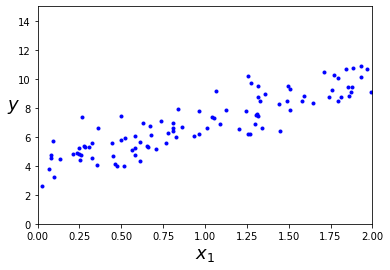

In [2]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.99769297],
       [3.03308094]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99769297],
       [10.06385485]])

[0, 2, 0, 15]

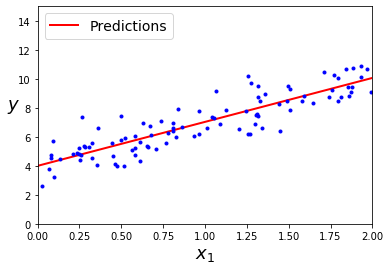

In [5]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

In [12]:
# Now let's do linear regression using scikitlearn 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

In [13]:
lin_reg.predict(X_new)

array([[3.56401543],
       [5.25125671]])

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[ 3.65558076],
       [-0.250253  ]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[ 3.65558076],
       [-0.250253  ]])

<h1><center>Optmization Solution Using Gradient Descent</center></h1>

<center><img src="img/gd.png" align="center"/></center>

<h1><center>Gradient Descent - Learning Rate Too Small</center></h1>

<center><img src="img/learning-rate-small.png" align="center"/></center>

<h1><center>Gradient Descent - Learning Rate Too Large</center></h1>

<center><img src="img/learning-rate-large.png" align="center"/></center>

<h1><center>Gradient Descent - Pitfalls</center></h1>

<center><img src="img/gd-pitfalls.png" align="center"/></center>

<h1><center>Gradient Descent Demos</center></h1>


https://www.deeplearning.ai/ai-notes/optimization/?utm_source=social&utm_medium=linkedin&utm_campaign=BlogAINotesOptimizationAugust272019

<h1><center>Gradient Descent - Math Notation</center></h1>

**Equation 4-3: MSE cost function for a Linear Regression model**

$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$


**Equation 4-5: Partial derivatives of the cost function**

$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$


<h1><center>Gradient Descent - Batch GD</center></h1>

**Equation 4-6: Gradient vector of the cost function**

$
\nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\boldsymbol{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\boldsymbol{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\boldsymbol{\theta})
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$



**Equation 4-7: Gradient Descent step**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta})
$

<h1><center>Stochastic Gradient Descent</center></h1>

- The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.


- At the opposite extreme, Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.

<h1><center>Mini-Batch Gradient Descent</center></h1>

- At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random subsets of instances called mini-batches.


- The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

$ O(\frac{1}{\text{iterations}}) $


$ \hat{y} = 0.56 x_1^2 + 0.93 x_1 + 1.78 $


$ y = 0.5 x_1^2 + 1.0 x_1 + 2.0 + \text{Gaussian noise} $


$ \dfrac{(n+d)!}{d!\,n!} $


$ \alpha \sum_{i=1}^{n}{{\theta_i}^2}$

<h1><center>Non-Linear Regression - Polynomial Regression</center></h1>

- To address the non-lineaity of the patterns of the dataset, the regression model should be non-linear.


- One way of adding non-linearity to a regression model is polynomial regression.

In [2]:
# Let's generate some non-linear data
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

print(X[0])
print(y[0])

[-0.75275929]
[1.61761105]


[-3, 3, 0, 10]

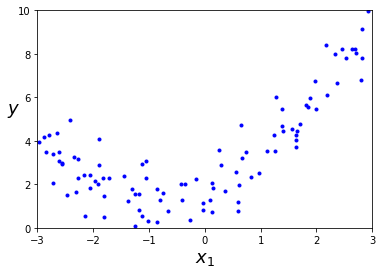

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [21]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

[-3, 3, 0, 10]

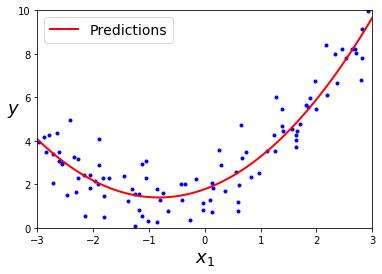

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

<h1><center>Bias Variance Trade-off</center></h1>

- ML model’s generalization error can be expressed as the sum of three very different errors:



- Bias: This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.



- Variance: This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.



- Irreducible error: This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

<h1><center>Bias Variance Trade-off</center></h1>


- "Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off."

Hands-On ML Textbook

<h1><center>Regularized Linear Regression</center></h1>

- Regularization is a common technique in ML to avoid overfitting - usually by constraining the model parameters. We study three regularized version of linear regression:

    - Ridge Regression

    - LASSO Regression

    - Elastic net

<h1><center>Regularized Regression - Ridge Regression</center></h1>

**Equation 4-8: Ridge Regression cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$


<b>Note</b> that the regularization term should only be added to the cost function during training. Once the model is trained, you use the unregularized performance measure to evaluate the model’s performance.

**Equation 4-9: Ridge Regression closed-form solution**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}
$

<h1><center>Regularized Regression - LASSO Regression</center></h1>

**Equation 4-10: Lasso Regression cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

<h1><center>Regularized Regression - Elastic Net</center></h1>

**Equation 4-12: Elastic Net cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$

<h1><center>Can We Use Regression for Classification?</center></h1>

<h1><center>Logistic Regression</center></h1>

<h1><center>Logistic Function - Sigmoid</center></h1>

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

**Equation 4-14: Logistic function**

$
\sigma(t) = \dfrac{1}{1 + \exp(-t)}
$

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

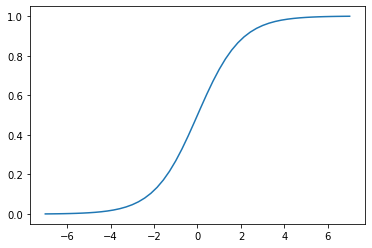

In [4]:
x = np.linspace(-7, 7, 50)
plt.plot(x, sigmoid(x))

In [11]:
sample = [0.5, 1, 2, 20, 2020]
sigmoid(sample[4])

1.0

<h1><center>Logistic Regression - Estimating Class Probabilities</center></h1>


**Equation 4-13: Logistic Regression model estimated probability (vectorized form)**

$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \mathbf{x})
$


**Equation 4-15: Logistic Regression model prediction**

$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$

<h1><center>Logistic Regression - Cost Function</center></h1>

**Equation 4-16: Cost function of a single training instance**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$




**Equation 4-17: Logistic Regression cost function (log loss)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

<h1><center>Logistic Regression - Softmax</center></h1>

<center><img src="img/logistic-softmax.png" align="center"/></center>

Image from MJ Lee (UNCC)

<h1><center>Logistic Regression - Softmax and Multi-class Classification</center></h1>

- Softmax function outputs class probabilities that sum to 1.0 hence very useful for multi-class classification.

$$
g(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$

In [5]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [12]:
x = np.arange(5) 
print(x)

[0 1 2 3 4]


In [13]:
y = softmax(x)
print(y)

[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


In [14]:
sum_y = y[0] + y[1] + y[2] + y[3] + y[4]
print(sum_y)

1.0
